In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from dataset import NCFDataset
from recom_ncf import NCFRecommender
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/review-clean.csv')[['user_idx', 'item_idx', 'rating_imp', 'timestamp', 'review']]
df.head()

,user_idx,item_idx,rating_imp,timestamp,review
0,0,0,1,1738278781,A legendary tactical shooter that shaped the g...
1,1,0,1,1736206418,"The best CS sure, but server browser is the il..."
2,2,0,1,1738041574,Some of the best memories of my childhood were...
3,3,0,1,1738015332,This game feels so much better than CS2. I kno...
4,4,0,1,1737853720,its very fun to play you can make friends out ...


## Splitting the data

In [3]:
df_train_eval, df_test = train_test_split(df[['user_idx', 'item_idx', 'rating_imp']], test_size=0.1, random_state=42)
df_train, df_eval = train_test_split(df_train_eval, test_size=(0.1/0.9), random_state=42)

train_dataset = NCFDataset(df_train)
eval_dataset = NCFDataset(df_eval)
test_dataset = NCFDataset(df_test)

train_dataloader = DataLoader(train_dataset, batch_size=8192, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=8192, shuffle=False)
test_dataloader = DataLoader(eval_dataset, batch_size=8192, shuffle=False)

unique_users = df["user_idx"].unique()
unique_items = df["item_idx"].unique()

In [4]:
print(df_train.shape)
print(df_eval.shape)
print(df_test.shape)

(1413153, 3)
(176645, 3)
(176645, 3)


## Train model

In [5]:
model = NCFRecommender(unique_users, unique_items, epochs=1)
model.fit(train_dataloader, eval_dataloader)

Epoch 1/1
Train loss: 0.773764, Eval loss: 0.759392
Training completed!


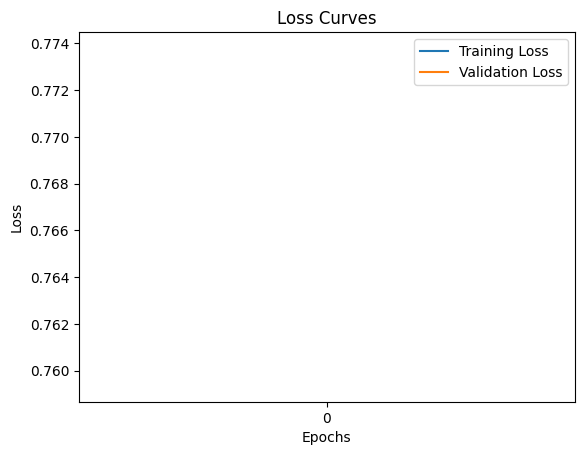

In [6]:
train_losses = model.train_losses
eval_losses = model.eval_losses
epochs = model.epochs

plt.plot(range(0, epochs), train_losses, label="Training Loss")
plt.plot(range(0, epochs), eval_losses, label="Validation Loss")
plt.xticks(ticks=np.arange(0, epochs + 1, 2))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend()
plt.show()

In [7]:
model.save('models/test-model.pt')

In [8]:
from evaluation import Evaluation

evaluator = Evaluation(recommender=model, test_data=df_test, k=10)
evaluator.evaluate()

Starting evaluation preparation...
Creating ground truth sets for 149008 users...
Processing ground truth: 0/149008 users
Processing ground truth: 1000/149008 users
Processing ground truth: 2000/149008 users
Processing ground truth: 3000/149008 users
Processing ground truth: 4000/149008 users
Processing ground truth: 5000/149008 users
Processing ground truth: 6000/149008 users
Processing ground truth: 7000/149008 users
Processing ground truth: 8000/149008 users
Processing ground truth: 9000/149008 users
Processing ground truth: 10000/149008 users
Processing ground truth: 11000/149008 users
Processing ground truth: 12000/149008 users
Processing ground truth: 13000/149008 users
Processing ground truth: 14000/149008 users
Processing ground truth: 15000/149008 users
Processing ground truth: 16000/149008 users
Processing ground truth: 17000/149008 users
Processing ground truth: 18000/149008 users
Processing ground truth: 19000/149008 users
Processing ground truth: 20000/149008 users
Process

{'Hit Ratio@10': 0.00026844196284763237,
 'NDCG@10': 0.00013893140740337461,
 'Recall@10': 0.00024568470266774406}